In [ ]:
0




import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
!python -m nltk.downloader stopwords
stop_words = set(stopwords.words('english'))

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import nltk

In [ ]:
pip install wordcloud

In [ ]:
pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 24.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
df=pd.read_csv('/content/covidtweets (1).csv')

In [ ]:
df.head()

,timestamp,tweet_text,all_hashtags,followers_count,sentaiment_score
0,4/29/20 23:58,b'#HealthcareHeroes we love you. THANK YOU FOR...,"['HealthcareHeroes', 'CoronavirusUSA', 'Courag...",79,0.500000
1,4/29/20 23:57,b'When you can finally cook for your family an...,"['COVID19', 'CoronavirusUSA', 'covidsurvivor',...",312,0.431429
2,4/29/20 23:56,b'In support of our #HealthcareHeroes treating...,"['HealthcareHeroes', 'COVID19', 'COVID', 'Nurs...",65,0.133333
3,4/29/20 23:55,b'Who is behind the #coronavirus social distan...,"['coronavirus', 'CoronavirusUSA', 'Coronavirus...",1432,-0.183333
4,4/29/20 23:55,b'#CoronavirusUSA Tonights stats - https://t....,['CoronavirusUSA'],7230,0.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25197 entries, 0 to 25196
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp         25197 non-null  object 
 1   tweet_text        25197 non-null  object 
 2   all_hashtags      25197 non-null  object 
 3   followers_count   25197 non-null  int64  
 4   sentaiment_score  25197 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 984.4+ KB


In [ ]:
df.shape

(25197, 5)

In [ ]:
df.isnull().sum()

timestamp           0
tweet_text          0
all_hashtags        0
followers_count     0
sentaiment_score    0
dtype: int64

In [ ]:
df.columns

Index(['timestamp', 'tweet_text', 'all_hashtags', 'followers_count',
       'sentaiment_score'],
      dtype='object')

In [ ]:
text_df = df.drop(['timestamp',  'all_hashtags', 'followers_count',
       'sentaiment_score'], axis=1)
text_df.head()

,tweet_text
0,b'#HealthcareHeroes we love you. THANK YOU FOR...
1,b'When you can finally cook for your family an...
2,b'In support of our #HealthcareHeroes treating...
3,b'Who is behind the #coronavirus social distan...
4,b'#CoronavirusUSA Tonights stats - https://t....


In [ ]:
print(text_df['tweet_text'].iloc[0],"\n")
print(text_df['tweet_text'].iloc[1],"\n")
print(text_df['tweet_text'].iloc[2],"\n")
print(text_df['tweet_text'].iloc[3],"\n")
print(text_df['tweet_text'].iloc[4],"\n")

b'#HealthcareHeroes we love you. THANK YOU FOR ALL YOU DO AND ARE DOING IN THIS FIGHT AGAINST #CoronavirusUSA YOUR #CourageIsBeautiful God bless you, you are in our prayers.' 

b'When you can finally cook for your family and your kids put in their request. Then they say,  "Mama, I\'m glad you\'re not sick anymore, this my favorite".. lol #COVID19 #CoronavirusUSA #covidsurvivor #lovemyfamily' 

b'In support of our #HealthcareHeroes treating #COVID19 patients. FREE group memberships. Entire course library + #COVID specific content. Form:https://t.co/5L6mQcoGAD #NursesCOVID19 #COVIDfoam #FOAMed #medtwitter #EmergencyMedicine #FirstResponders #coronavirususa #doctors #nurses' 

b'Who is behind the #coronavirus social distancing protests? https://t.co/NBKIn8tSUX #CoronavirusUSA #CoronavirusPandemic #COVID19 #VoteHimOUT #VoteBlueToEndThisNightmare #VoteBlue2020 #WakeUpAmerica #WakeUP' 

b'#CoronavirusUSA  Tonights stats - https://t.co/nNZh9txKFy' 



In [ ]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25197 entries, 0 to 25196
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_text  25197 non-null  object
dtypes: object(1)
memory usage: 197.0+ KB


In [ ]:

text_df.rename(columns = {'tweet_text':'text'}, inplace = True)

In [ ]:

text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25197 entries, 0 to 25196
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    25197 non-null  object
dtypes: object(1)
memory usage: 197.0+ KB


In [ ]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [ ]:
!python -m nltk.downloader punkt

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
text_df.text = text_df['text'].apply(data_processing)

In [ ]:
text_df = text_df.drop_duplicates('text')

In [ ]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [ ]:
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))

In [ ]:
text_df.head()

,text
0,bhealthcareheroes love thank fight coronavirus...
1,bwhen finally cook family kids put request say...
2,bin support healthcareheroes treating covid19 ...
3,bwho behind coronavirus social distancing prot...
4,bcoronavirususa tonights stats


In [ ]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
text_df['polarity'] = text_df['text'].apply(polarity)

In [ ]:
text_df.head()

,text,polarity
0,bhealthcareheroes love thank fight coronavirus...,0.500000
1,bwhen finally cook family kids put request say...,0.217143
2,bin support healthcareheroes treating covid19 ...,0.133333
3,bwho behind coronavirus social distancing prot...,-0.183333
4,bcoronavirususa tonights stats,0.000000


In [ ]:
def sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [ ]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [ ]:
text_df.head()

,text,polarity,sentiment
0,bhealthcareheroes love thank fight coronavirus...,0.500000,Positive
1,bwhen finally cook family kids put request say...,0.217143,Positive
2,bin support healthcareheroes treating covid19 ...,0.133333,Positive
3,bwho behind coronavirus social distancing prot...,-0.183333,Negative
4,bcoronavirususa tonights stats,0.000000,Neutral


In [ ]:
# prompt: create a plot

import matplotlib.pyplot as plt
sns.countplot(x='sentiment', data=text_df)
plt.show()


<Axes: xlabel='sentiment', ylabel='count'>

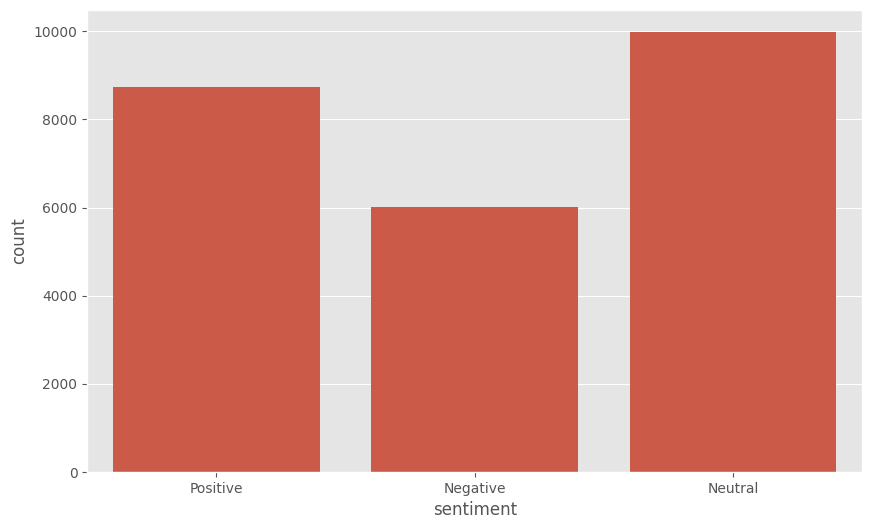

In [ ]:
fig=plt.figure(figsize=(10,6))
sns.countplot(x='sentiment',data=text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

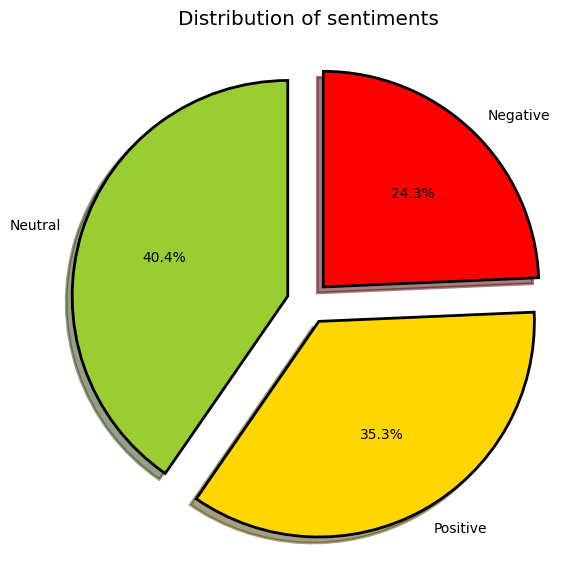

In [ ]:
fig=plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')


In [ ]:
pos_tweets = text_df[text_df['sentiment'] == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,text,polarity,sentiment
6204,brealdonaldtrump nancypelosi senschumer dnc wo...,1.0,Positive
9055,bthe perfect storm donxe2x80x99t want jobs hea...,1.0,Positive
23621,bplease share best alternatives filters insert...,1.0,Positive
1922,brealdonaldtrump retweeting best done shower e...,1.0,Positive
12121,bhitehouse learn coronavirususa watching drbir...,1.0,Positive


In [ ]:
from wordcloud import WordCloud

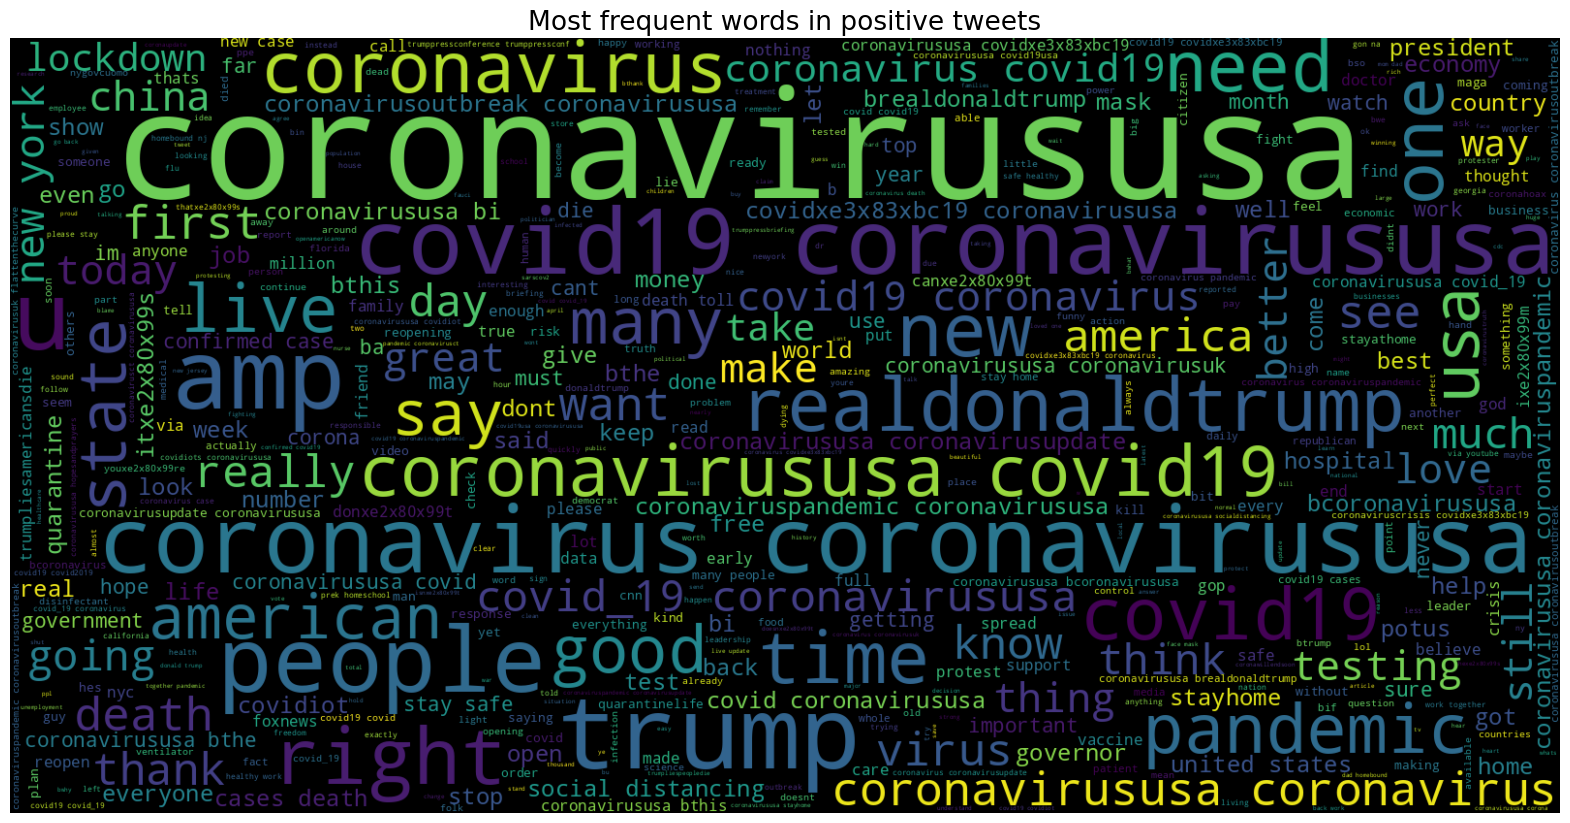

In [ ]:
text = ' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [ ]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,text,polarity,sentiment
14631,bjkarsh 3m tests daily move towards opening co...,-9.251859e-18,Negative
4308,bmaddow trump hires another c ranked ethically...,-1.387779e-17,Negative
17285,bcovid19 coronavirususa covidiots donxe2x80x99...,-1.387779e-17,Negative
5160,bwouldnt make logical sense letting people wor...,-1.850372e-17,Negative
22441,bnow presidents fault blacks diabetes hyperten...,-2.775558e-17,Negative


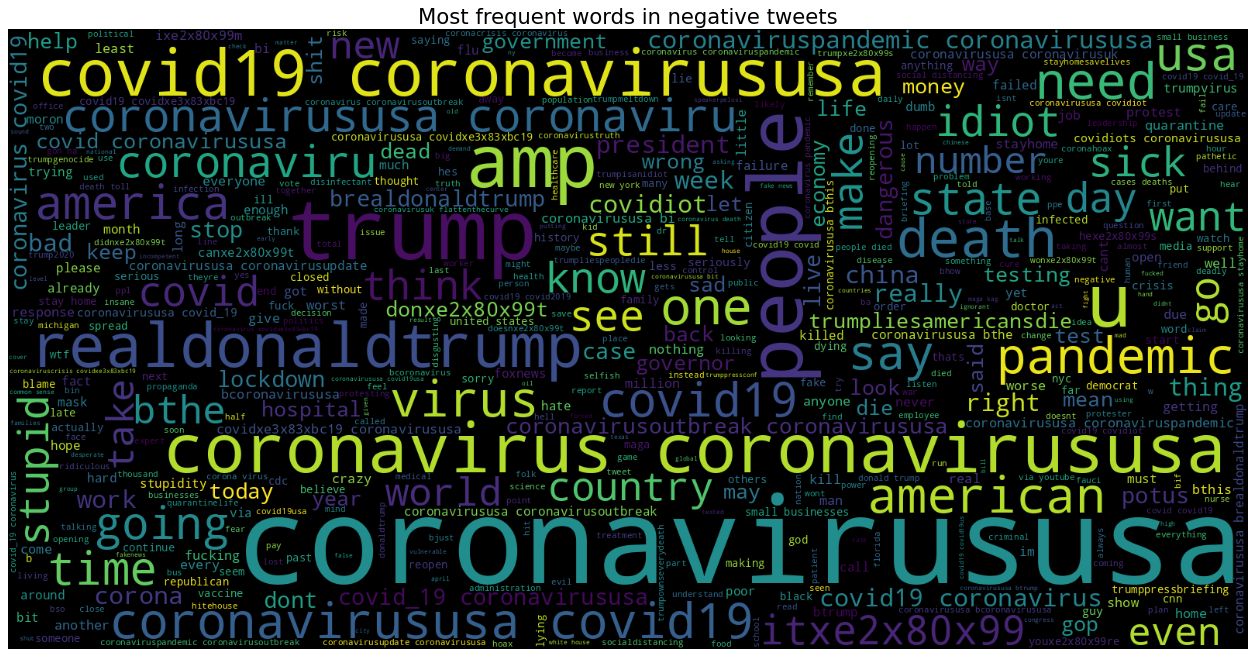

In [ ]:
text = ' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [ ]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,text,polarity,sentiment
4,bcoronavirususa tonights stats,0.0,Neutral
17093,bjoebiden juliecllloyd trump democrat hoax amp...,0.0,Neutral
17075,bposting comment auspol coronavirususa trumpli...,0.0,Neutral
17076,bhitehouse realdonaldtrump lying traitorstoame...,0.0,Neutral
17078,bobama administration asked funding prepare fu...,0.0,Neutral


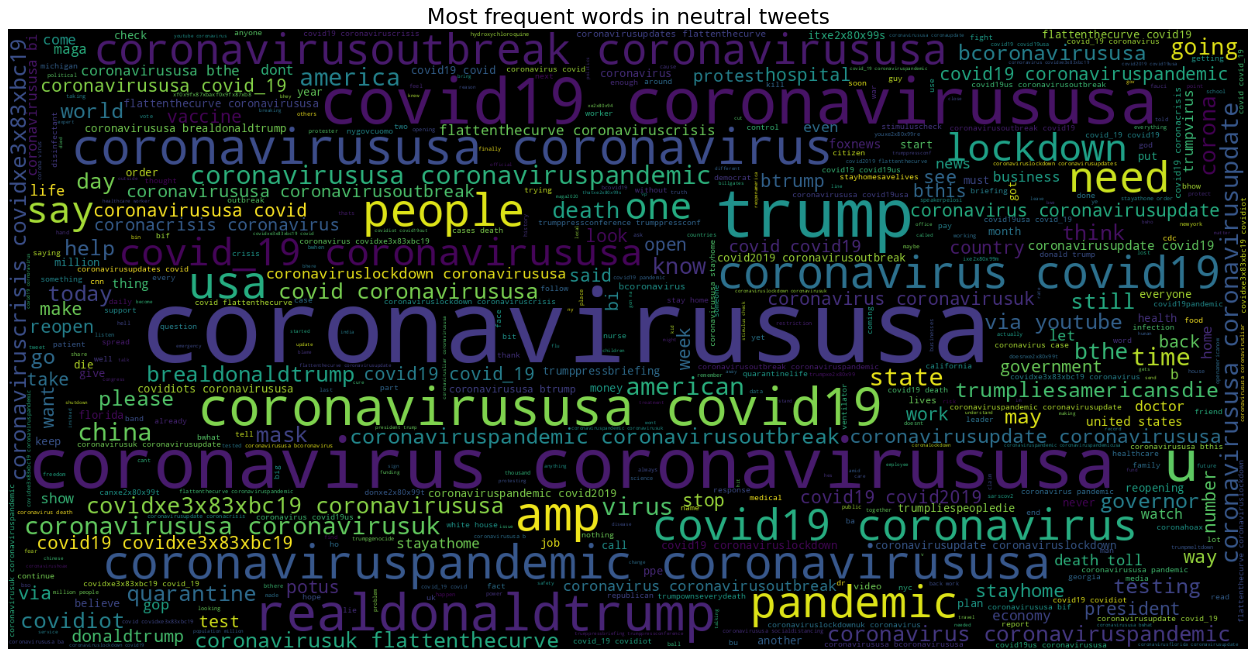

In [ ]:
text = ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [ ]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])

In [ ]:
feature_names = vect.get_feature_names_out()

In [ ]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 316903

First 20 features:
 ['00' '00 cases' '000' '000 american' '000 americans' '000 auspol'
 '000 cases' '000 confirmed' '000 covid19' '000 dead' '000 deaths'
 '000 testing' '0000082' '0000082 chance' '00001' '00001 covid_19' '00003'
 '00003 approximately' '00046' '00046 population']


In [ ]:
X = text_df['text']
Y = text_df['sentiment']
X = vect.transform(X)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (19796, 316903)
Size of y_train: (19796,)
Size of x_test: (4950, 316903)
Size of y_test: (4950,)


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 84.75%


In [ ]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 866  230  136]
 [  28 1874   25]
 [  71  265 1455]]


              precision    recall  f1-score   support

    Negative       0.90      0.70      0.79      1232
     Neutral       0.79      0.97      0.87      1927
    Positive       0.90      0.81      0.85      1791

    accuracy                           0.85      4950
   macro avg       0.86      0.83      0.84      4950
weighted avg       0.86      0.85      0.84      4950



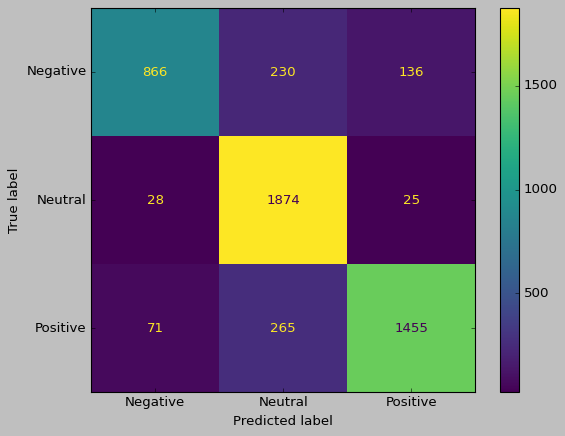

In [ ]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [ ]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10}


In [ ]:
y_pred = grid.predict(x_test)

In [ ]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 85.70%


In [ ]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 888  212  132]
 [  29 1875   23]
 [  71  241 1479]]


              precision    recall  f1-score   support

    Negative       0.90      0.72      0.80      1232
     Neutral       0.81      0.97      0.88      1927
    Positive       0.91      0.83      0.86      1791

    accuracy                           0.86      4950
   macro avg       0.87      0.84      0.85      4950
weighted avg       0.86      0.86      0.85      4950



In [ ]:
from sklearn.svm import LinearSVC
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [ ]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 86.79%


In [ ]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[ 926  181  125]
 [  27 1875   25]
 [  67  229 1495]]


              precision    recall  f1-score   support

    Negative       0.91      0.75      0.82      1232
     Neutral       0.82      0.97      0.89      1927
    Positive       0.91      0.83      0.87      1791

    accuracy                           0.87      4950
   macro avg       0.88      0.85      0.86      4950
weighted avg       0.87      0.87      0.87      4950



In [ ]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)


GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [ ]:
print("Best parameter:", grid.best_params_)

Best parameter: {'C': 10}


In [ ]:
y_pred = grid.predict(x_test)

In [ ]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 87.03%


In [ ]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 930  177  125]
 [  27 1875   25]
 [  67  221 1503]]


              precision    recall  f1-score   support

    Negative       0.91      0.75      0.82      1232
     Neutral       0.82      0.97      0.89      1927
    Positive       0.91      0.84      0.87      1791

    accuracy                           0.87      4950
   macro avg       0.88      0.86      0.86      4950
weighted avg       0.88      0.87      0.87      4950

